In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import rasterio
import matplotlib.pyplot as plt

C:\Users\might\Desktop\python\.gds\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\might\AppData\Local\Temp\ipykernel_7288\3006484041.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedo

In [2]:
lat_lon = (45.9951, -123.9201)
g = ox.graph_from_point(lat_lon, dist=8000, network_type='walk')

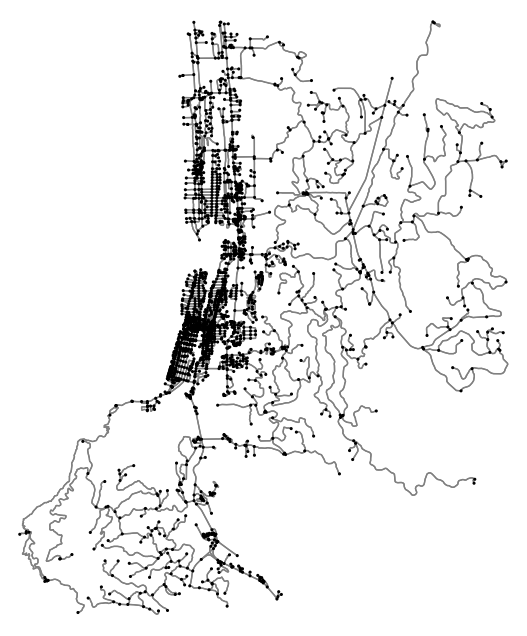

In [3]:
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [5]:
import os
os.environ['USE_PYGEOS'] = '0'

In [6]:
cities = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-scenarios/data_ibell/citylim_2021/citylim.shp')
cities.head()

,CITY_NAME,instName,unitID,descriptn,instCode,codeRef,effDate,unitOwner,cSteward,acres,EFFECTV_DT,GIS_PRC_DT,Shape_Leng,Shape_Area,geometry
0,Adair Village,Adair Village,ODOT,Incorporated City Limit Boundary,00275,FIPS,20210000,2409661,ODOT,286.389671,2021,9/20/2021,24645.761574,1.247513e+07,"POLYGON ((606486.544 1079731.871, 606519.008 1..."
1,Adams,Adams,ODOT,Incorporated City Limit Boundary,00350,FIPS,20210000,2409662,ODOT,230.591317,2021,9/20/2021,14345.564615,1.004456e+07,"POLYGON ((1806116.356 1467893.258, 1806055.680..."
2,Adrian,Adrian,ODOT,Incorporated City Limit Boundary,00500,FIPS,20210000,2409664,ODOT,155.900900,2021,9/20/2021,10511.276609,6.791043e+06,"POLYGON ((2219501.033 745901.646, 2219514.441 ..."
3,Albany,Albany,ODOT,Incorporated City Limit Boundary,01000,FIPS,20210000,2409675,ODOT,11342.259180,2021,9/20/2021,262984.796754,4.940688e+08,"POLYGON ((629747.496 1076850.309, 630118.784 1..."
4,Amity,Amity,ODOT,Incorporated City Limit Boundary,02000,FIPS,20210000,2409700,ODOT,402.796064,2021,9/20/2021,28212.961728,1.754580e+07,"POLYGON ((614322.084 1240483.773, 614403.596 1..."


In [7]:
seaside = cities[cities["CITY_NAME"]=="Seaside"]
seaside.head()

,CITY_NAME,instName,unitID,descriptn,instCode,codeRef,effDate,unitOwner,cSteward,acres,EFFECTV_DT,GIS_PRC_DT,Shape_Leng,Shape_Area,geometry
189,Seaside,Seaside,ODOT,Incorporated City Limit Boundary,65950,FIPS,20210000,2411854,ODOT,2614.179614,2021,9/20/2021,145597.895628,1.138737e+08,"POLYGON ((445725.062 1572704.545, 445735.231 1..."


In [10]:
node_graph = ox.graph_to_gdfs(g, nodes=True, edges=False)

In [11]:
edge_graph = ox.graph_to_gdfs(g, nodes=False, edges=True)

In [12]:
seaside.crs

<Derived Projected CRS: EPSG:2992>
Name: NAD83 / Oregon GIC Lambert (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon.
- bounds: (-124.6, 41.98, -116.47, 46.26)
Coordinate Operation:
- name: Oregon GIC Lambert (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
node_graph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
node_reproject = node_graph.to_crs('EPSG:32610')
edge_reproject = edge_graph.to_crs('EPSG:32610')
seaside_reproject = seaside.to_crs('EPSG:32610')

In [16]:
from shapely.geometry import Polygon

In [17]:
node_clip = node_reproject.clip(seaside_reproject)

<AxesSubplot: >

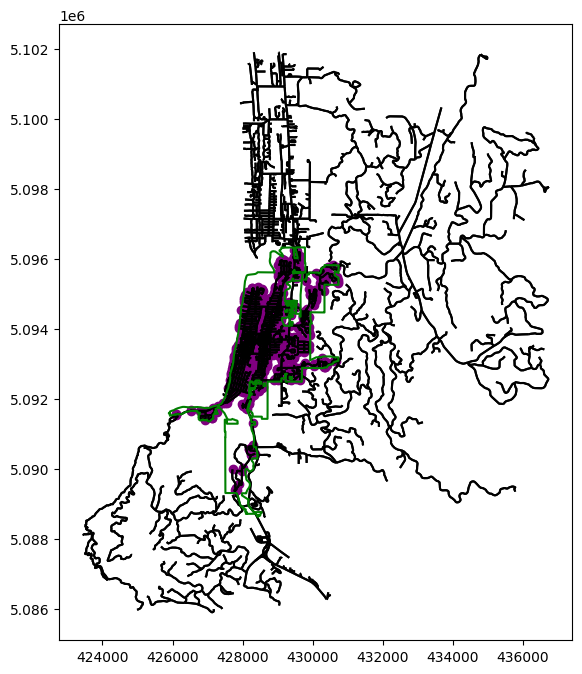

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
node_clip.plot(ax=ax, color="purple")
seaside_reproject.boundary.plot(ax=ax, color="green")